In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.lib.scimath import sqrt as csqrt
import matplotlib.ticker as tck
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator,
                               ScalarFormatter)

In [11]:
j = csqrt(-1)
pi = np.pi
wc = pi/2
M = [1, 5, 15, 50]
w = np.linspace(-pi, pi, 1000)
parcel = np.zeros(1000)
H_M = np.zeros((len(M),1000))
H_0 = np.ones(1000)*wc/pi
for k in range(len(M)):
    for n in range(-M[k], M[k]+1):
        if (n == 0):
            parcel = np.ones(1000)
            H_M[k,:] = H_M[k,:] + H_0
        else:
            parcel = np.sin(wc*n)/(pi*n)*np.exp(-j*w*n)
            H_M[k,:] = H_M[k,:] + parcel

C:\Users\moise\AppData\Local\Temp\ipykernel_66652\2808949622.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  H_M[k,:] = H_M[k,:] + parcel


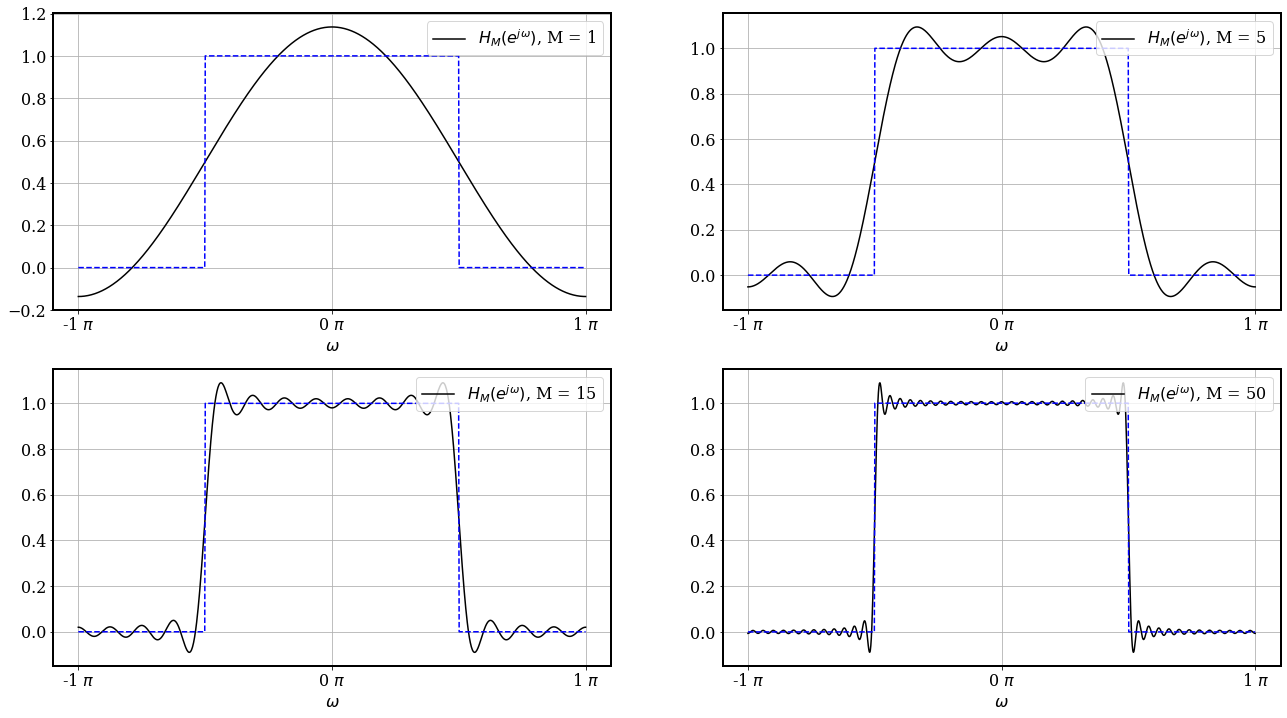

In [12]:
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
w_ = np.linspace(-wc, 0.9*wc, 1000)
figure, ax = plt.subplots(2, 2, figsize = (22, 12))

ax[0][0].plot(w/pi, H_M[0,:], label = '$H_M (e^{j\omega})$' + ', M = ' + str(M[0]), color = 'black')
ax[0][0].plot(w/pi, np.heaviside(w + wc, 1) - np.heaviside(w - wc, 1),'--', color = 'blue')
ax[0][0].grid(True)
ax[0][0].legend(loc = 'upper right')
ax[0][0].set_xlabel('$\omega$')
ax[0][0].xaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
ax[0][0].xaxis.set_major_locator(MultipleLocator(base=1))

ax[0][1].plot(w/pi, H_M[1,:], label = '$H_M (e^{j\omega})$' + ', M = ' + str(M[1]), color = 'black')
ax[0][1].plot(w/pi, np.heaviside(w + wc, 1) - np.heaviside(w - wc, 1),'--', color = 'blue')
ax[0][1].grid(True)
ax[0][1].legend(loc = 'upper right')
ax[0][1].set_xlabel('$\omega$')
ax[0][1].xaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
ax[0][1].xaxis.set_major_locator(MultipleLocator(base=1))

ax[1][0].plot(w/pi, H_M[2,:], label = '$H_M (e^{j\omega})$' + ', M = ' + str(M[2]), color = 'black')
ax[1][0].plot(w/pi, np.heaviside(w + wc, 1) - np.heaviside(w - wc, 1),'--', color = 'blue')
ax[1][0].grid(True)
ax[1][0].legend(loc = 'upper right')
ax[1][0].set_xlabel('$\omega$')
ax[1][0].xaxis.set_major_formatter(FormatStrFormatter('%0d $\pi$'))
ax[1][0].xaxis.set_major_locator(MultipleLocator(base=1))

ax[1][1].plot(w/pi, H_M[3,:],label = '$H_M (e^{j\omega})$' + ', M = ' + str(M[3]), color = 'black')
ax[1][1].plot(w/pi, np.heaviside(w + wc, 1) - np.heaviside(w - wc, 1),'--', color = 'blue')
ax[1][1].grid(True)
ax[1][1].legend(loc = 'upper right')
ax[1][1].set_xlabel('$\omega$')
ax[1][1].xaxis.set_major_formatter(FormatStrFormatter('%g $\pi$'))
ax[1][1].xaxis.set_major_locator(MultipleLocator(base=1))

Text(0.5, 1.0, 'Total energy error')

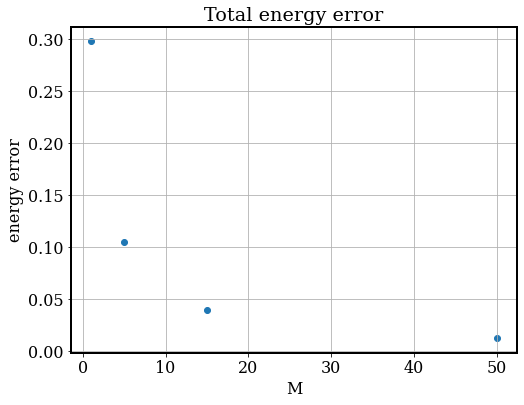

In [13]:
H_W_ideal = np.heaviside(w + wc, 1) - np.heaviside(w - wc, 1)
energy_error = np.zeros(len(M))
for i in range(len(M)):
    energy_error[i] = np.trapz(abs(H_M[i,:] - H_W_ideal)**2, w)

fig = plt.figure(figsize = (8, 6))
plt.rc('font', **font)
plt.rc('axes', linewidth=2)
plt.scatter(M, energy_error)
plt.grid(True)
plt.xlabel('M')
plt.ylabel('energy error')
plt.title('Total energy error')